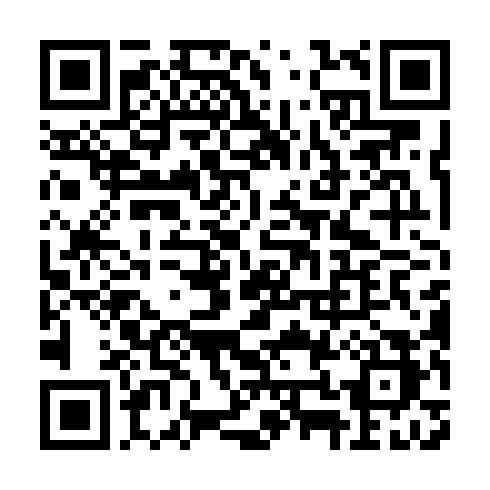

Iris-setosa
-1


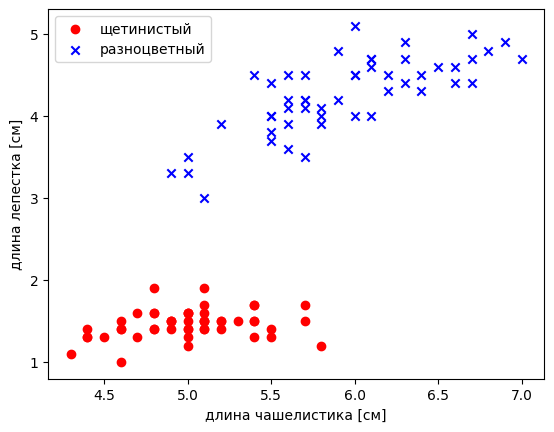

In [ ]:
# импортируем модуль pandas c псевдонимом pd
import pandas as pd
# Читаем значения в датафрейм df  из CSV  таблицы, по умолчанию разделитель ","
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None )
#help(pd.read_csv) # Если хотите посмотреть все параметры
# показываем последние 10 значений фрейма для наглядности
df.tail(10)
#импортируем pyplot для визуализации и numpy для работы с векторами.
import matplotlib.pyplot as plt
import numpy as np
# выбираем из датафрейма первые 100 записей целевой переменной - ирис щетинистый и ирис разноцветный
y = df.iloc[0:100, 4].values
print(y[0])
# заменяем текстовые значения, значениями области определения функции активации персептрона (-1 и 1)
y = np.where(y == 'Iris-setosa',-1, 1)
print(y[0])

# Извлекаем значения длинны чашелистика и длинны лепестка (столбцы 0 и 2)
X = df.iloc[0:100,[0,2]].values

# Вычерчиваем график
# первые 50 значений из выборки - ирис цетинистый
plt.scatter(X[:50,0],X[:50,1],
            color = 'red', marker = 'o', label = 'щетинистый')
# c 50 по 100 значение - ирис разноцветный
plt.scatter(X[50:100, 0],X[50:100, 1],
            color = 'blue', marker = 'x', label = 'разноцветный')
plt.xlabel('длина чашелистика [см]')
plt.ylabel('длина лепестка [см]')
plt.legend(loc='upper left')
plt.show()

In [ ]:
import numpy as np
class AdalineGD(object):
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    # параметр эта - скорость обучения 0.1 - 1
    self.eta = eta
    # количество эпох обучения
    self.n_iter = n_iter
    # значение для генератора случайных чисел
    self.random_state = random_state

  def fit(self,X,y):
    # создем контейнер для генератора случайных чисел
    rgen = np.random.RandomState(self.random_state)
    # присваиваем случайные значения с нормальным распределением вектору w_ омега
    self.w_=rgen.normal(loc=0.0, scale=0.01, size = 1+X.shape[1])
    # Массив J(w) для всех эпох обучения
    self.cost_ = []
    # Цикл по эпохам обучений
    for i in range(self.n_iter):
       #Вычисляем ф(z)
       net_input = self.net_input(X)
       #Вызываем функцию активации
       output =  self.activation(net_input)
       # Вычисляем y-ф(z)
       errors = (y-output)
       # изменяем вестовые коэффициенты wi рассчитав градиент
       # тут матрично векторное умножение !!!!!!
       self.w_[1:] += self.eta*X.T.dot(errors)
       # изменяем вестовой коэффициент w0
       self.w_[0] += self.eta*errors.sum()
       # Считаем квадратичную сумму ошибки J(w)
       cost = (errors**2).sum()/2.0
       #добавляем значение квадратичной ошибки в массив эпох
       self.cost_.append(cost)
    return self

  # функция вычисления ф(z) = wT*x
  def net_input(self,X):
    return np.dot(X,self.w_[1:])+self.w_[0]

  # Функция активаци, на самом деле она ничего не делает потому... что ф(z)=wT*x
  # а ее мы посчитали в net_input
  def activation(self,X):
    return X
  # пороговая ф-ция, ф-ция Хевисайда, используется только при работе нейрона
  def predict(self,X):
    return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

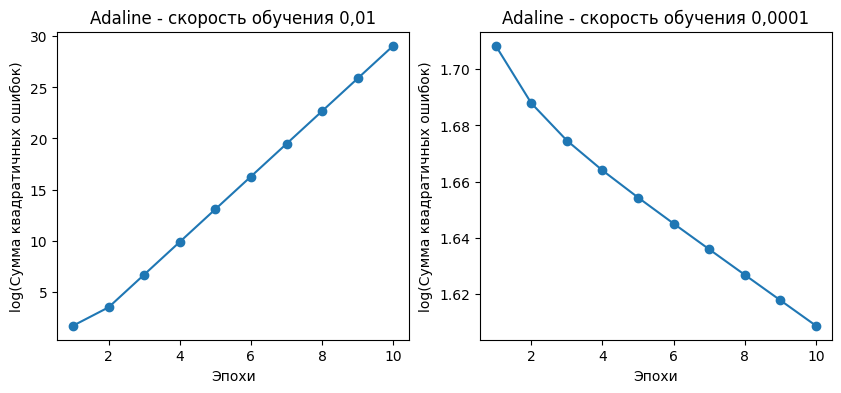

In [ ]:
# Создадим два разных случая с разной скоростью обучения
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
# при скорости eta=0.01 - не позволяет нам попасть в глобальный минимум
ada1 = AdalineGD(n_iter=10,eta=0.01,).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_)+1,),np.log10(ada1.cost_),marker='o')
ax[0].set_xlabel('Эпохи')
ax[0].set_ylabel('log(Сумма квадратичных ошибок)')
ax[0].set_title('Adaline - скорость обучения 0,01')

# при скорости eta=0.0001 - приводит нас к минимуму
ada2 = AdalineGD(n_iter=10,eta=0.0001,).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_)+1,),np.log10(ada2.cost_),marker='o')
ax[1].set_xlabel('Эпохи')
ax[1].set_ylabel('log(Сумма квадратичных ошибок)')
ax[1].set_title('Adaline - скорость обучения 0,0001')
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier, resolution = 0.2):
  markers = ('s','x','o','^','v')
  colors = ('red','blue','lightgreen','gray','cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  x1_min , x1_max = X[:,0].min()-1, X[:,0].max() + 1
  x2_min , x2_max = X[:,1].min()-1, X[:,1].max() + 1
  xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                        np.arange(x2_min,x2_max,resolution))
  Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
  plt.xlim(xx1.min(),xx1.max())
  plt.ylim(xx2.min(),xx2.max())
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y==cl,0],
                y=X[y==cl,1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')

<ipython-input-4-916e220bacf1>:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],


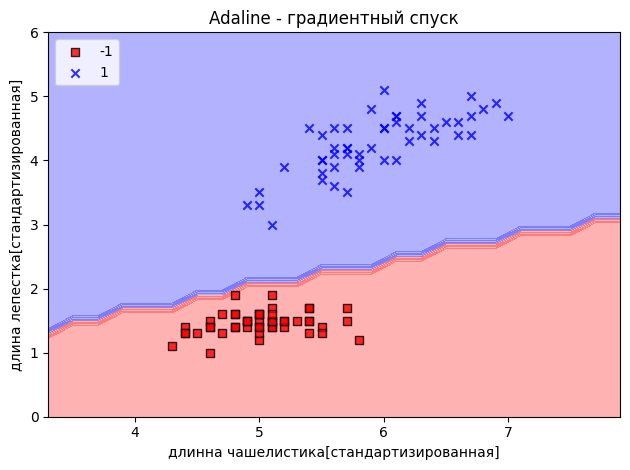

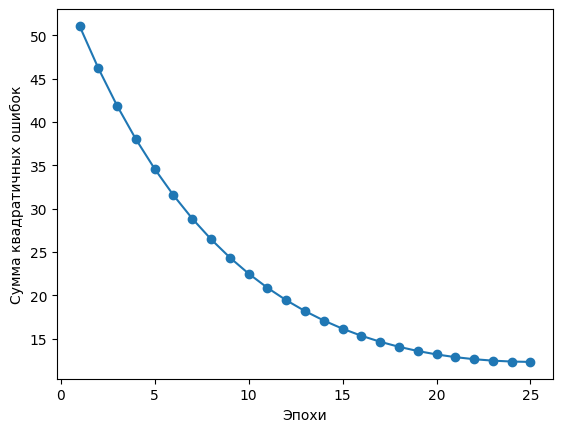

In [ ]:
# Управляя количеством эпох и скоростью обучения мы можем подобрать параметры для успешного обучения
ada = AdalineGD(n_iter=25, eta=0.0005)
ada.fit(X,y)
plot_decision_regions(X,y,classifier=ada)
plt.title('Adaline - градиентный спуск')
plt.xlabel('длинна чашелистика[стандартизированная]')
plt.ylabel('длина лепестка[стандартизированная]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1,len(ada.cost_)+1),ada.cost_,marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Сумма квадратичных ошибок')

plt.show()

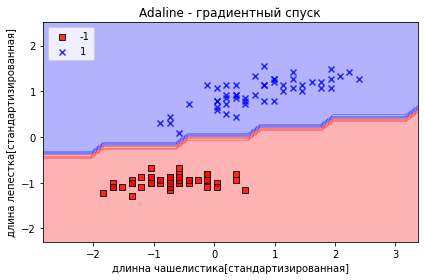

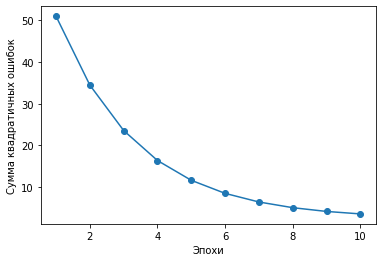

In [ ]:
#Улучшим градиентный спуск  масштабированием признаков.
#Стандартизация
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

ada = AdalineGD(n_iter=10,eta=0.01)
ada.fit(X_std,y)
plot_decision_regions(X_std,y,classifier=ada)
plt.title('Adaline - градиентный спуск')
plt.xlabel('длинна чашелистика[стандартизированная]')
plt.ylabel('длина лепестка[стандартизированная]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1,len(ada.cost_)+1),ada.cost_,marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Сумма квадратичных ошибок')
plt.show()

подобрать минимальное количество эпох обучения при максимальном значении коэф обучения.

